In [1]:
import numpy as np
import time
from noise_analysis import *

from neutral_covariance_test import *
from noise_properties_plotting import *

np.random.seed(int(time.time()))

import matplotlib.pyplot as plt
%matplotlib inline

import collections

def cm2inch(value):
    return value/2.54;

/Users/wkits/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
textwidth = cm2inch(14) #5.5
fullwidth = cm2inch(18.5)

fontsize=7

#font = {'family': 'Arial', 'size': 9}
font = {'family': 'Open Sans', 'size': fontsize}
mpl.rc('font', **font)
mpl.rc('legend', handlelength=1)

mpl.rcParams['legend.fontsize'] = fontsize
mpl.rcParams['figure.titlesize'] = fontsize
mpl.rcParams['axes.titlesize'] = fontsize
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.labelpad'] = 4

mpl.rcParams["legend.borderaxespad"] = 0.2
mpl.rcParams["legend.handlelength"] = 0.8
mpl.rcParams['lines.markersize'] = 3
mpl.rcParams['lines.linewidth'] = 0.8

In [3]:
# determine noise color

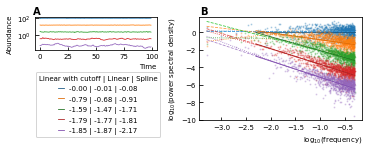

In [9]:
N = 50
    
steadystate = np.logspace(-2,2,50)[::-1]

params = {}

# no immigration
params['immigration_rate'] = np.zeros([N, 1])

omega = np.random.normal(0,0.1,[N, N]); # np.zeros([N,N]);
np.fill_diagonal(omega, -1)
params['interaction_matrix'] = omega

# growthrates determined by the steady state
g = - omega.dot(steadystate).reshape([N,1])
params['growth_rate'] = g

initcond = np.array([np.random.normal(abundance, 0.1*abundance) 
                     for abundance in steadystate]).reshape([N,1])

params['initial_condition'] = initcond
params['noise_linear'] = 1e-1

x = Timeseries(params, noise_implementation = NOISE.LANGEVIN_LINEAR,
                    dt=0.01, tskip=4, T=100.0).timeseries

fig = plt.figure(figsize=(textwidth,2))

gs = gridspec.GridSpec(2,2,wspace=0.3, hspace=0.5, top=0.9, right=0.95, bottom=0.18,
                       width_ratios=[0.75,1], height_ratios=[1,1.5])
ax_ts = fig.add_subplot(gs[0])
ax_pws = fig.add_subplot(gs[:,1])
ax_leg = fig.add_subplot(gs[2])
ax_leg.axis('off')
ax_left = fig.add_subplot(gs[:,0])
ax_left.axis('off')
ax_left.text(0.05, 1.1, 'A', transform=ax_left.transAxes, fontsize=10, fontweight='bold', 
                  va='top', ha='right')
ax_pws.text(0.05, 1.1, 'B', transform=ax_pws.transAxes, fontsize=10, fontweight='bold', 
                  va='top', ha='right')

ax_ts.set_yscale('log')
ax_ts.set_ylabel('Abundance')
ax_ts.set_xlabel('Time', ha='right', x=1)


for j in range(1, N+1, int(N/5)):
    ax_ts.plot(x['time'][::10], x['species_%d'%j][::10])

    example_noise_fit(ax_pws, x['species_%d'%j], spline=True, linear_all=True)

ax_pws.set_xlabel('log$_{10}$(frequency)', ha='right', x=1)

handles, labels = ax_pws.get_legend_handles_labels()
ax_leg.legend(handles, labels, title='Linear with cutoff | Linear | Spline', loc=2)

plt.savefig('figures_elife/supplemental/noisecolor_fit2.pdf')